In [2]:
"""
PROJECT 20: Sms spam collection
TASK: Natural Language Processing to predict a SMS is spam or not spam
PROJECT GOALS AND OBJECTIVES
PROJECT GOAL
- Studying Feed-forward neural network for NPL
- Studying tokenization, text vectorisation and embedding
PROJECT OBJECTIVES
1. Exploratory Data Analysis
2. Training several dense model
3. Predict a SMS is spam or not spam
"""

'\nPROJECT 20: Sms spam collection\nTASK: Natural Language Processing to predict a SMS is spam or not spam\nPROJECT GOALS AND OBJECTIVES\nPROJECT GOAL\n- Studying Feed-forward neural network for NPL\n- Studying tokenization, text vectorisation and embedding\nPROJECT OBJECTIVES\n1. Exploratory Data Analysis\n2. Training several dense model\n3. Predict a SMS is spam or not spam\n'

In [3]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [4]:
# LOAD AND EXPLORE DATASET

# Path to data
train_data_path = "data/train.csv"
test_data_path = "data/test.csv"

# Create dataframe
train_df = pd.read_csv(train_data_path, index_col=0)
test_df = pd.read_csv(test_data_path, index_col=0)
train_df.head()

,'type','text'
'id',,
1,ham,Go until jurong point
2,ham,Ok lar... Joking wif u oni...'
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,Nah I don't think he goes to usf


In [5]:
train_df.columns = ["label","message"]
train_df.info()
train_df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 310
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    310 non-null    object
 1   message  309 non-null    object
dtypes: object(2)
memory usage: 7.3+ KB


ham     263
spam     47
Name: label, dtype: int64

In [6]:
code_spam_ham = {"ham": 0,
                 "spam": 1}

train_df['label'] = train_df['label'].map(code_spam_ham)
train_df.head()

,label,message
'id',,
1,0,Go until jurong point
2,0,Ok lar... Joking wif u oni...'
3,1,Free entry in 2 a wkly comp to win FA Cup fina...
4,0,U dun say so early hor... U c already then say...
5,0,Nah I don't think he goes to usf


In [7]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,label,message
'id',,
290,0,India have to take lead:)'
10,1,Had your mobile 11 months or more? U R entitle...
58,0,Sorry
61,0,Your gonna have to pick up a $1 burger for you...
26,0,Just forced myself to eat a slice. I'm really ...


In [8]:
test_df.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 311 to 611
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   'text'  299 non-null    object
dtypes: object(1)
memory usage: 4.7+ KB


In [9]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 310
Total test samples: 301
Total samples: 611


In [10]:
# Random training examples
random_index = random.randint(0, len(train_df) - 5)
for row in train_df_shuffled[["label", "message"]][random_index:random_index + 5].itertuples():
    _, label, message = row
    print(f"Target: {label}", "(spam)" if label > 0 else "(not spam)")
    print(f"Text:\n{message}\n")
    print("---\n")

Target: 0 (not spam)
Text:
Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol'

---

Target: 0 (not spam)
Text:
Sorry my roommates took forever

---

Target: 0 (not spam)
Text:
Smile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!'

---

Target: 0 (not spam)
Text:
He will

---

Target: 0 (not spam)
Text:
Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today

---



In [11]:
# Split data
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["message"].to_numpy(),
                                                                            train_df_shuffled["label"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(279, 279, 31, 31)

In [12]:
# The first 10 training sentences and their labels
train_sentences[:10]
train_labels[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [13]:
# MULTINOMIAL NAIVE BAYES CLASSIFIER
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences.astype('str'), train_labels)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [14]:
# EVALUATION RESULTS
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Model accuracy: {baseline_score*100:.2f}%")

Model accuracy: 83.87%


In [15]:
# Predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 83.87096774193549,
 'precision': 0.8387096774193549,
 'recall': 1.0,
 'f1': 0.9122807017543859}

In [17]:
# EVALUATION AND VISUALIZATION OF MODEL PARAMETERS

def learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(20, 8))
    plt.grid(True)
    plt.title('Learning curves')
    plt.gca().set_ylim(0, 1)
    plt.show()


def evaluation_model(history):
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
    axL.plot(history.history['loss'], label="Training loss")
    axL.plot(history.history['val_loss'], label="Validation loss")
    axL.set_title('Training and Validation loss')
    axL.set_xlabel('Epochs')
    axL.set_ylabel('Loss')
    axL.legend(loc='upper right')

    axR.plot(history.history['accuracy'], label="Training accuracy")
    axR.plot(history.history['val_accuracy'], label="Validation accuracy")
    axR.set_title('Training and Validation accuracy')
    axR.set_xlabel('Epoch')
    axR.set_ylabel('Accuracy')
    axR.legend(loc='upper right')

    plt.show()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 128)           1280000   
_________________________________________________________________
global_average_pooling1d_3 ( (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


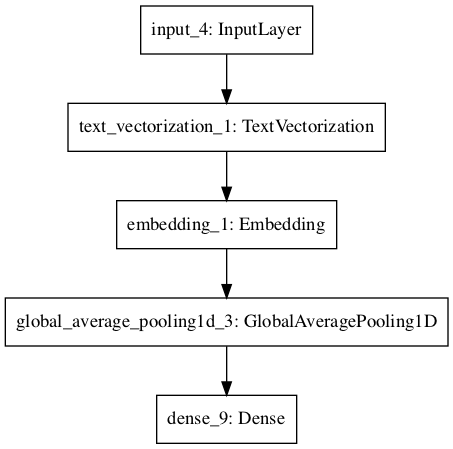

In [18]:
# DENSE MODEL №1
max_vocab_length = 10000
max_length = 50
# TextVectorization layer
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

text_vectorizer.adapt(train_sentences.astype('str'))

# Embedding Layer
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")

# Model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")


model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()
tf.keras.utils.plot_model(model_1, to_file='model_1_dense.png')

In [19]:
# Train model
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)
model_1_history = model_1.fit(train_sentences.astype('str'),
                              train_labels,
                              epochs=200,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[early_stopping_cb])

Epoch 1/200
9/9 [==============================] - ETA: 0s - loss: 0.6655 - accuracy: 0.8459

2021-10-20 23:52:06.079177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 26ms/step - loss: 0.6655 - accuracy: 0.8459 - val_loss: 0.6412 - val_accuracy: 0.8387
Epoch 2/200
9/9 [==============================] - 0s 16ms/step - loss: 0.6176 - accuracy: 0.8495 - val_loss: 0.5999 - val_accuracy: 0.8387


2021-10-20 23:52:06.333092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 3/200
9/9 [==============================] - 0s 16ms/step - loss: 0.5708 - accuracy: 0.8495 - val_loss: 0.5617 - val_accuracy: 0.8387
Epoch 4/200
9/9 [==============================] - 0s 16ms/step - loss: 0.5277 - accuracy: 0.8495 - val_loss: 0.5256 - val_accuracy: 0.8387
Epoch 5/200
9/9 [==============================] - 0s 16ms/step - loss: 0.4876 - accuracy: 0.8495 - val_loss: 0.4922 - val_accuracy: 0.8387
E

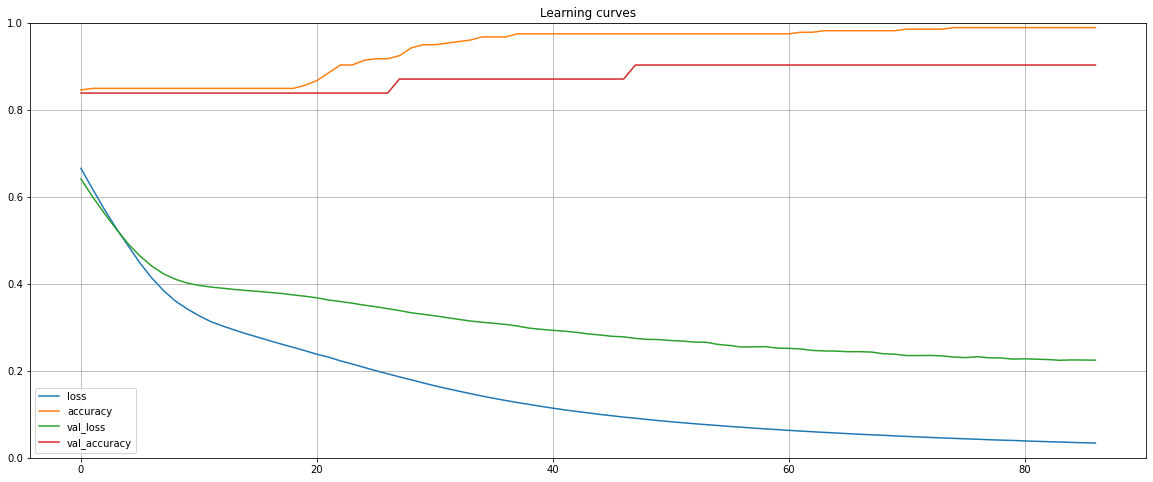

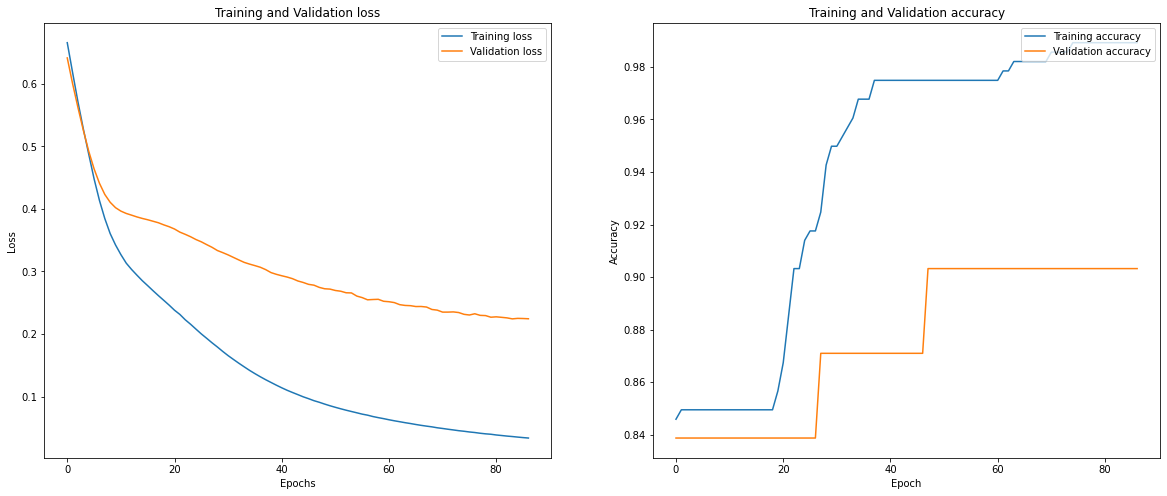

1/1 [==============================] - 0s 16ms/step - loss: 0.2243 - accuracy: 0.9032


2021-10-20 23:52:19.607260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


{'accuracy': 90.32258064516128,
 'precision': 0.9132369299221357,
 'recall': 0.9032258064516129,
 'f1': 0.8851277754503561}

In [20]:
# EVALUATION RESULT
# Learning curves
learning_curves(model_1_history)

# Evaluation model
evaluation_model(model_1_history)

# Check the results
model_1.evaluate(val_sentences, val_labels)

# Predictions
model_1_pred_probs = model_1.predict(val_sentences)
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

Model: "model_2_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 128)           1280000   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 1)               

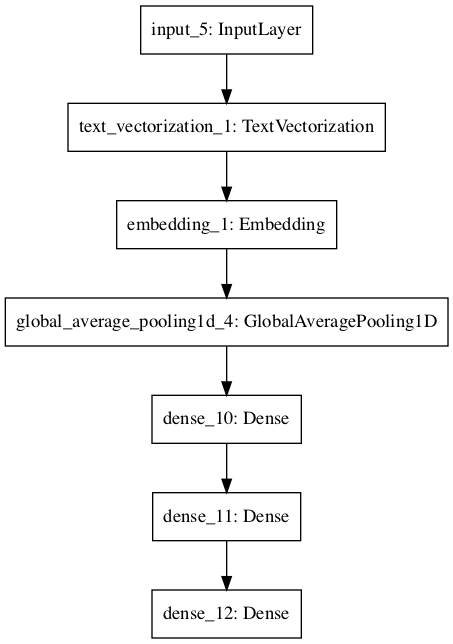

In [21]:
# DENSE MODEL №2
# Model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_dense")


model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.summary()
tf.keras.utils.plot_model(model_2, to_file='model_2_dense.png')

In [22]:
# Train model
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)
model_2_history = model_2.fit(train_sentences.astype('str'),
                              train_labels,
                              epochs=200,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[early_stopping_cb])

Epoch 1/200
7/9 [======================>.......] - ETA: 0s - loss: 0.5784 - accuracy: 0.8571

2021-10-20 23:52:20.446405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 32ms/step - loss: 0.5434 - accuracy: 0.8853 - val_loss: 0.4399 - val_accuracy: 0.9032
Epoch 2/200
6/9 [===================>..........] - ETA: 0s - loss: 0.2692 - accuracy: 0.9844

2021-10-20 23:52:20.747639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 21ms/step - loss: 0.2336 - accuracy: 0.9857 - val_loss: 0.2684 - val_accuracy: 0.9032
Epoch 3/200
9/9 [==============================] - 0s 18ms/step - loss: 0.0701 - accuracy: 0.9857 - val_loss: 0.2789 - val_accuracy: 0.9032
Epoch 4/200
9/9 [==============================] - 0s 17ms/step - loss: 0.0370 - accuracy: 0.9892 - val_loss: 0.3022 - val_accuracy: 0.9032
Epoch 5/200
9/9 [==============================] - 0s 17ms/step - loss: 0.0258 - accuracy: 0.9892 - val_loss: 0.2718 - val_accuracy: 0.9032

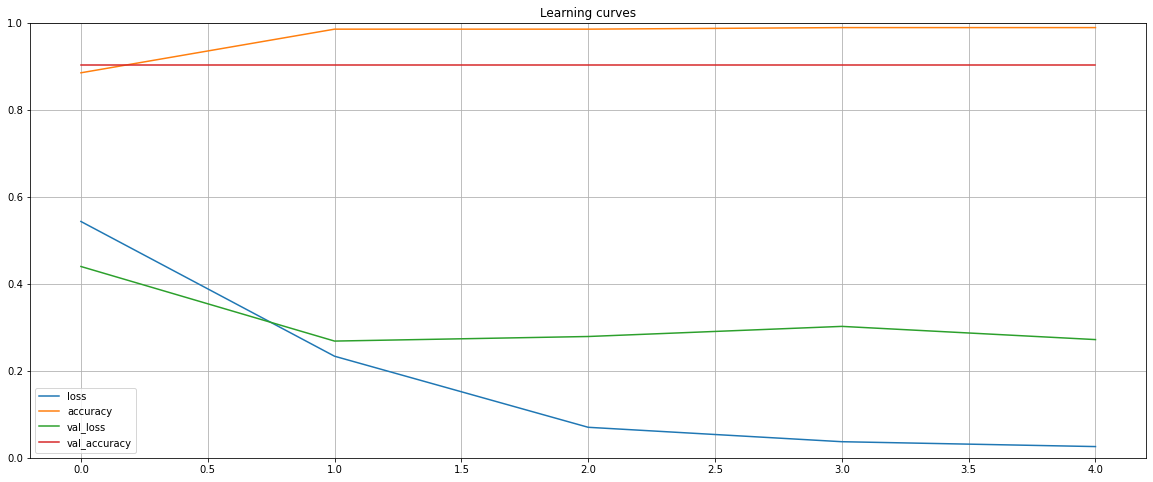

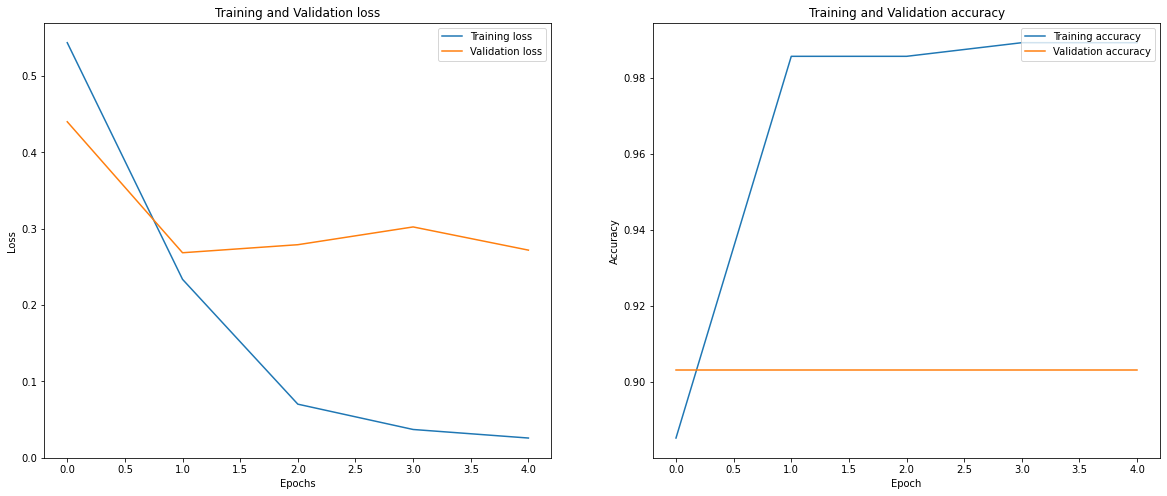

1/1 [==============================] - 0s 16ms/step - loss: 0.2684 - accuracy: 0.9032


2021-10-20 23:52:21.729189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


{'accuracy': 90.32258064516128,
 'precision': 0.9132369299221357,
 'recall': 0.9032258064516129,
 'f1': 0.8851277754503561}

In [23]:
# EVALUATION RESULT
# Learning curves
learning_curves(model_2_history)

# Evaluation model
evaluation_model(model_2_history)

# Check the results
model_2.evaluate(val_sentences, val_labels)

# Predictions
model_2_pred_probs = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:20]

model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

Model: "model_3_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 128)           1280000   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)             

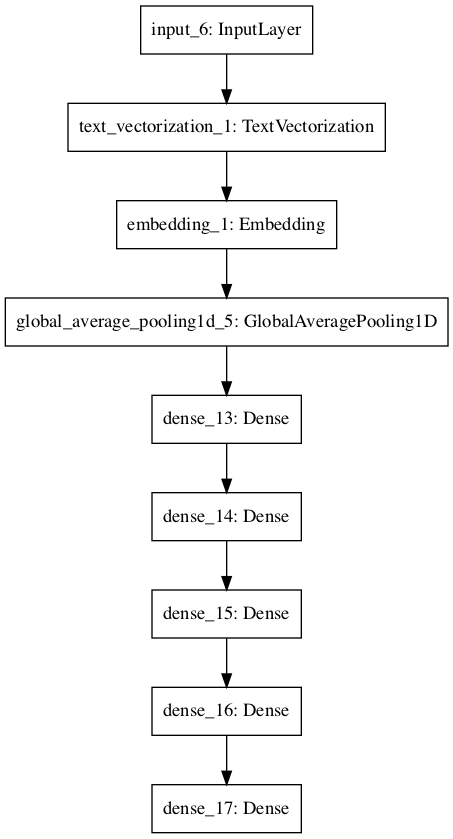

In [24]:
# DENSE MODEL №3
# Model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_dense")


model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.summary()
tf.keras.utils.plot_model(model_3, to_file='model_3_dense.png')

In [25]:
# Train model
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)
model_3_history = model_3.fit(train_sentences.astype('str'),
                              train_labels,
                              epochs=200,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[early_stopping_cb])

Epoch 1/200
5/9 [===============>..............] - ETA: 0s - loss: 0.5939 - accuracy: 0.9875

2021-10-20 23:52:22.394073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 31ms/step - loss: 0.4912 - accuracy: 0.9857 - val_loss: 0.3136 - val_accuracy: 0.9032
Epoch 2/200
8/9 [=========================>....] - ETA: 0s - loss: 0.0920 - accuracy: 0.9805

2021-10-20 23:52:22.698197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 18ms/step - loss: 0.0848 - accuracy: 0.9821 - val_loss: 0.3839 - val_accuracy: 0.9032
Epoch 3/200
9/9 [==============================] - 0s 22ms/step - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.1596 - val_accuracy: 0.9355
Epoch 4/200
9/9 [==============================] - 0s 26ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.1679 - val_accuracy: 0.9677
Epoch 5/200
9/9 [==============================] - 0s 24ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1937 - val_acc

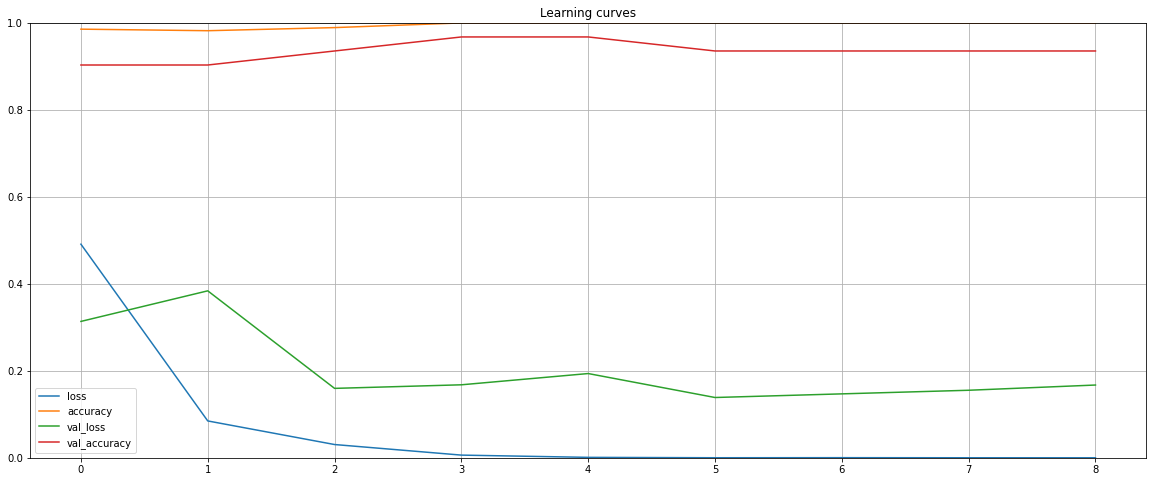

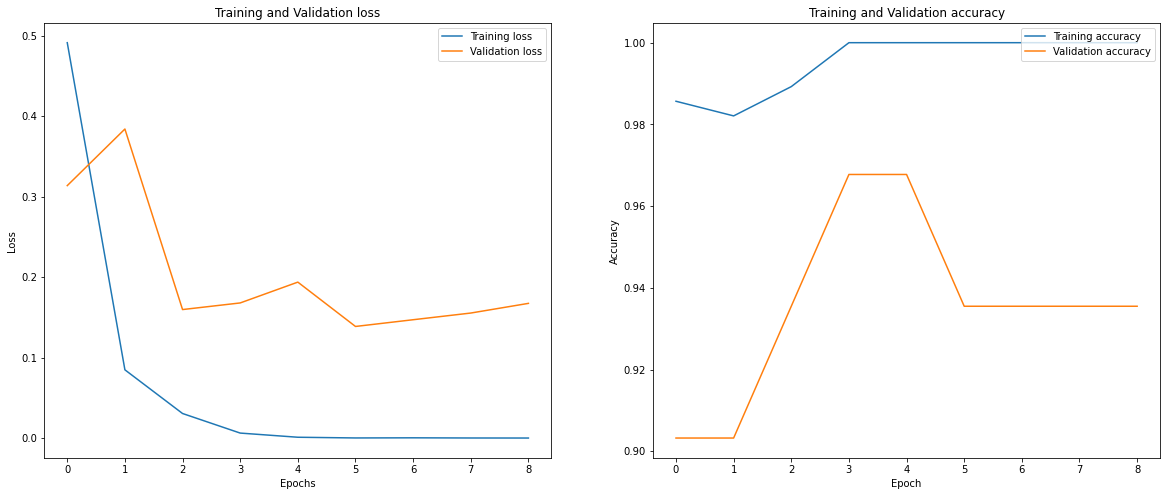

1/1 [==============================] - 0s 16ms/step - loss: 0.1386 - accuracy: 0.9355


2021-10-20 23:52:24.523855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


{'accuracy': 93.54838709677419,
 'precision': 0.9354838709677419,
 'recall': 0.9354838709677419,
 'f1': 0.9354838709677419}

In [26]:
# EVALUATION RESULT
# Learning curves
learning_curves(model_3_history)

# Evaluation model
evaluation_model(model_3_history)

# Check the results
model_3.evaluate(val_sentences, val_labels)

# Predictions
model_3_pred_probs = model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:20]

model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results
